# Project: Predicting Heart Disease
This project accurately predicts the likelihood of a new ptient having heart disease in the future.

There a multiple risk factors that could contribute to cardiovascular disease (CVD) in an individual such as unhealthy diet, lack of physical activity, or mental illness. Identifying these risk factors early on could prevent many premature deaths.

This project is useful for companies providing healthcare solutions..

# The Dataset
The Kaggle dataset contains anonymized data from multiple hospitals on several patients. It includes relevant information for each patient, such as their personal information and some medical data, including whether or not they have had heart disease before.

The dataset has the following features:
- `Age`: age of the patient [years]
- `Sex`: sex of the patient [M: Male, F: Female]
- `ChestPainType`: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- `RestingBP`: resting blood pressure [mm Hg]
- `Cholesterol`: serum cholesterol [mm/dl]
- `FastingBS`: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- `RestingECG`: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- `MaxHR`: maximum heart rate achieved [Numeric value between 60 and 202]
- `ExerciseAngina`: exercise-induced angina [Y: Yes, N: No]
- `Oldpeak`: oldpeak = ST [Numeric value measured in depression]
- `ST_Slope`: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- `HeartDisease`: output class [1: heart disease, 0: Normal]

# Libraries Importation

In [250]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [251]:
df = pd.read_csv("heart_disease_prediction.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [252]:
# Print the number of features (columns)
print(f"Number of features: {df.shape[1]}")
# Print the number of observations (rows)
print(f"Number of observations: {df.shape[0]}")
print(df.shape)

Number of features: 12
Number of observations: 918
(918, 12)


# EDA: Descriptive Statistics

In [253]:
print(df.dtypes)
df.dtypes.value_counts()


Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


int64      6
object     5
float64    1
Name: count, dtype: int64

We can see that we have both categorical and numerical features. 
The categorical columns are dtype object for this dataset. 
However, for a couple of columns such as FastingBS and HeartDisease, the dtype is int64 (numeric), but they are also categorical variables since they only take the values 0 and 1.

Let's stary by analyzing the numerical columns

In [254]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


**Age:** The average age of the patients is 53.5 years. 
   - The least age is 28 while the highest age is 77.   

**RestingBP:** The average resting BP is 132.39. 
   - The least is 0 (indicating that something could be wrong with the data since noone has a resting BP of 0). 
   - The highest is 200

**Cholesterol:** The average cholesterol level is 198.80.
   - The least is 0 (indicating that something could be wrong with the data since no one has a cholesterol of zero). As per the American Health association, serum cholesterol is a composite of different measurements, making it unlikely that it would be zero.
   - The highest is 603.

**FastingBS:** The average is 0.23. CATEGORICAL 
   - The minimum is 0 as expected
   - The highest is 1.

**MaxHR:** The average is 136.81
   - The minimum is 60.
   - The maximum is 202.

**Oldpeak:** The average is 0.88.
   - The minimum is -2.6.
   - The maximum is 6.2.

**HeartDisease:** This is the target variable. The mean is 0.55.
  - The minimum is 0 - no heart disease
  - The maximum is 1- heart disease.
  
There does not seem to be any missing values in these columns. However, this will have to be confirmed across the entire dataset.

Next, we will look at the categorical variables. It would also be of help to see how the taregt feature, `HeartDisease`, is related to these categories. Before that, let us quickly check whether there are any missing values in the dataset or not

### Number of Missing Values in All the Columns

In [255]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There are no missing values in the dataset!

# EDA: Data Visualizations

We identified that most of the categorical columns are all of dtype **object**.

In [256]:
df.describe(include= ['object'])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


We can confirm that each of these are indeed categorical based on the number of unique values in each of them. Also, FastingBS and HeartDisease are categorical as well since they only contain binary values. We can confirm that quickly as well.

In [257]:
df['FastingBS'].unique(), df['HeartDisease'].unique()

(array([0, 1], dtype=int64), array([0, 1], dtype=int64))

Let's start looking at the categories in more detail

### Counts for Each of the Categorical Columns Categories

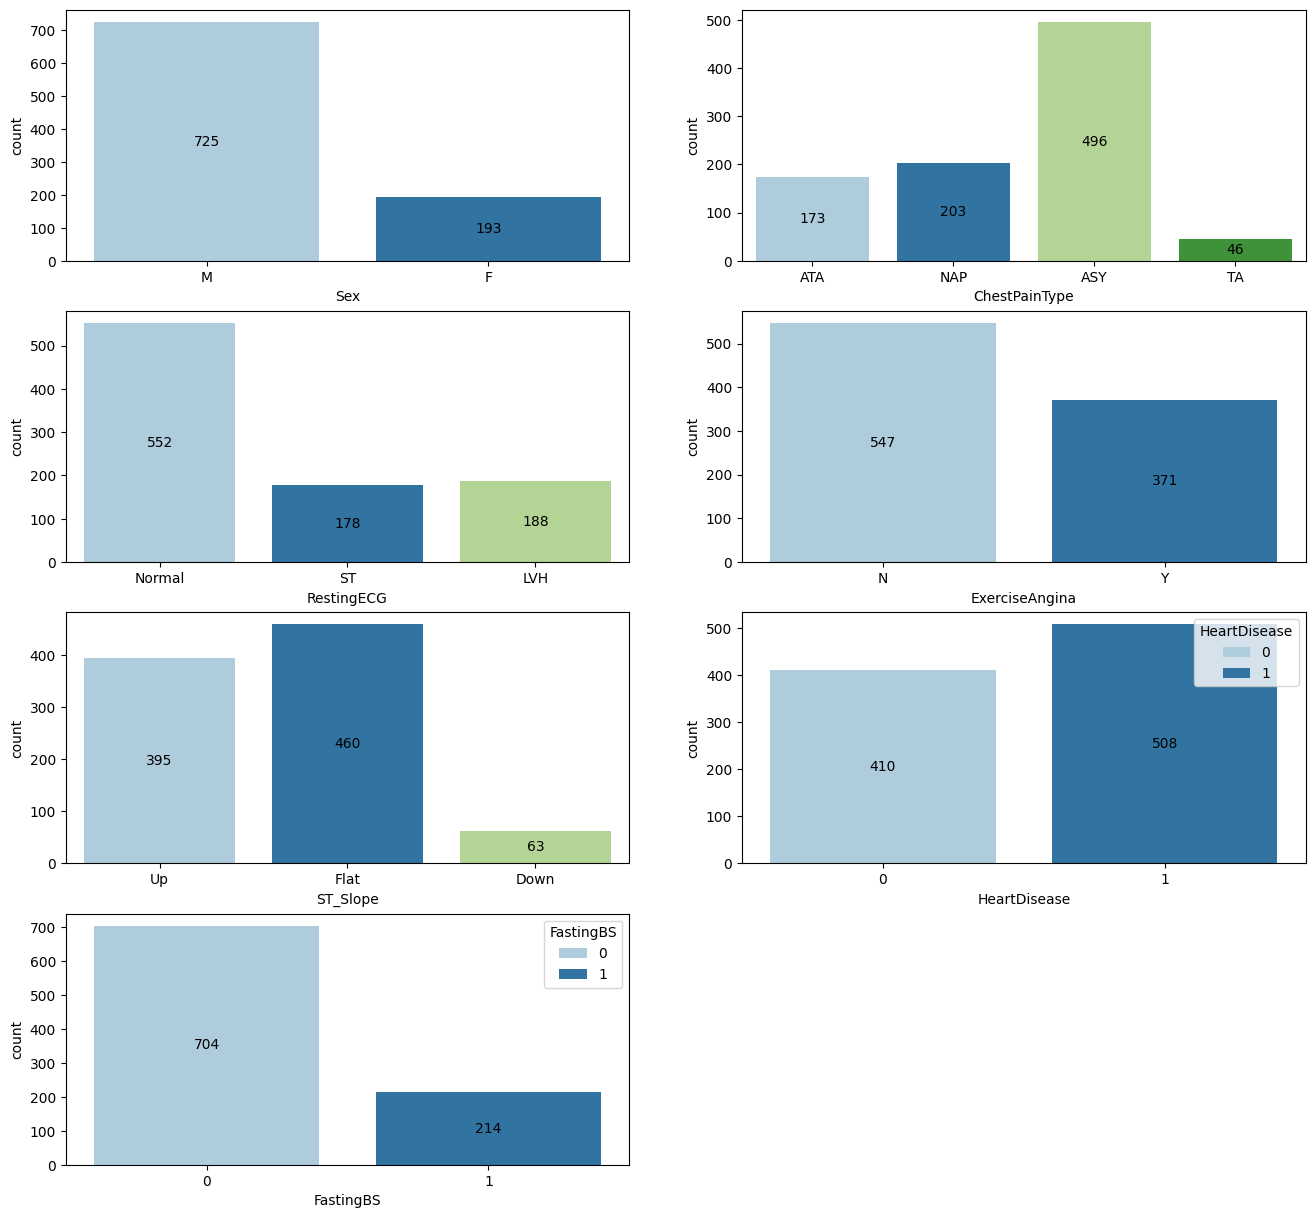

In [258]:
# Code to create a list for the categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
if 'HeartDisease' not in categorical_columns:
    categorical_columns.append('HeartDisease')
if 'FastingBS' not in categorical_columns:
    categorical_columns.append('FastingBS')

fig = plt.figure(figsize=(16,15))

for idx, col in enumerate(categorical_columns):
    ax = plt.subplot(4, 2, idx+1)
    sns.countplot(x=df[col], ax=ax, palette="Paired", hue = df[col])
    # add data labels to each bar
    for container in ax.containers:
        ax.bar_label(container, label_type="center");

**Sex:** There are more males than females (725 versus 193) 
**ChestPainType:** ASY (493), NAP (203), ATA (173), TA  
**RestingECG:** Normal, LVH, ST  
**ExerciseAngina:** Nos are more that Yeses  
**ST_Slope:** Flat, Up, then Down  
**HeartDisease:** 1(presence of heart disease) more than 0 (absence of heart disease)  
**FastingBS:** 0 is more than 1  

Grouping these by `HeartDisease` will give us a better idea about the data distribution.

### Categorical Columns Grouped By Heart Disease

In [259]:
# Removing HeartDisease from the categorical columns list to display the number of rows
# for the categorical columns grouped by HeartDisease
categorical_columns.pop(5)

'HeartDisease'

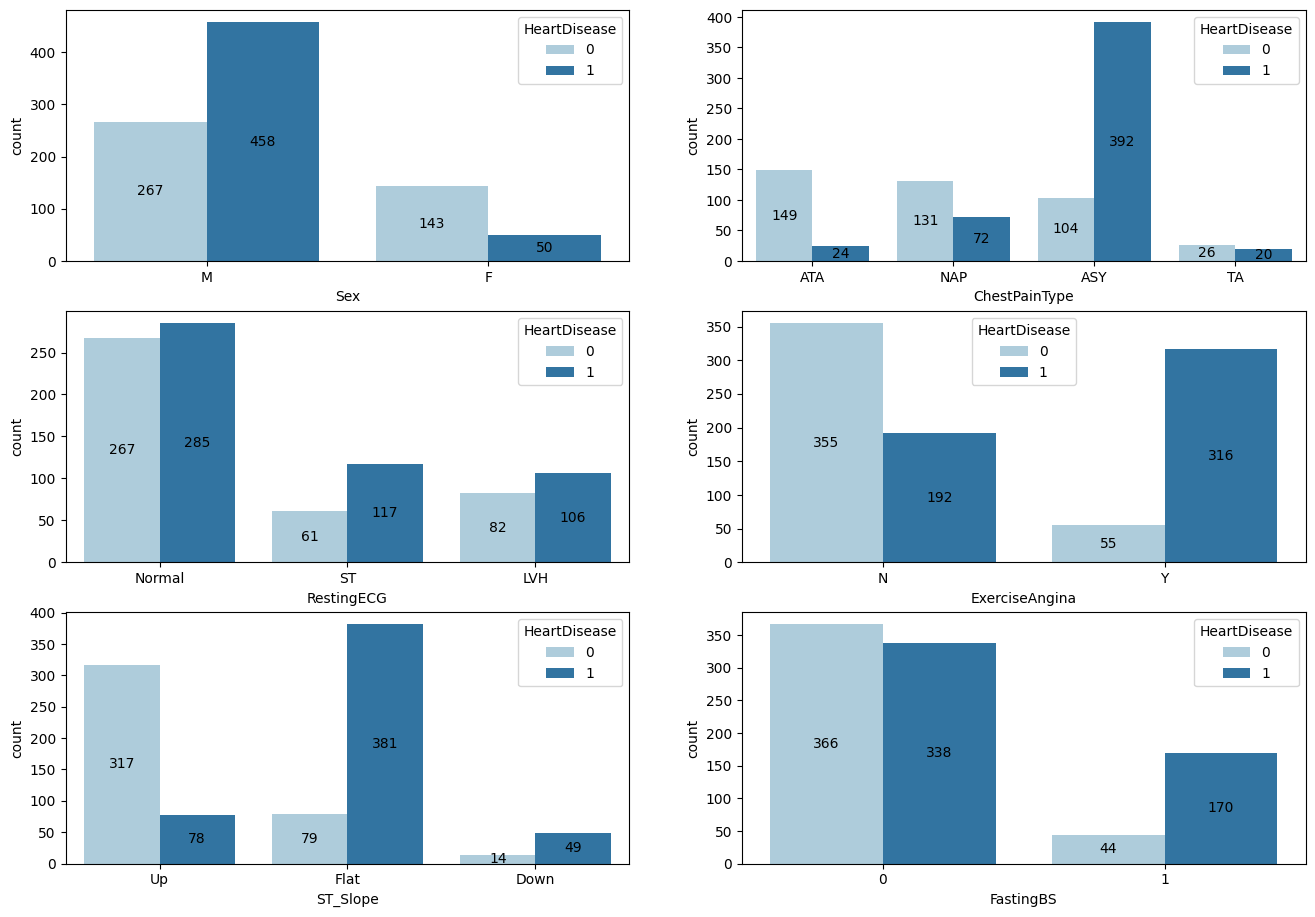

In [260]:
fig = plt.figure(figsize=(16,15))

for idx, col in enumerate(categorical_columns):
    ax = plt.subplot(4, 2, idx+1)
    # group by HeartDisease
    sns.countplot(x=df[col], hue=df["HeartDisease"], ax=ax, palette='Paired')
    # add data labels to each bar
    for container in ax.containers:
        ax.bar_label(container, label_type="center")

**Sex:** Males have a higher count of patients with heart disease than females.  
**ChestPainType:** ASY has the highest count of patients with heart disease. This indicates that a significant number of patients diagnosed with heart disease have asymptomatic chest pain. While chest pain could be a relevant feature for the model, asymptomatic implies that those patients who had heart disease did not have chest pain as a sympton.
**RestingECG:** Most of the patients diagnosed with heart disease had a normal resting ECG.  
**ExerciseAngina:** Out of all the patients with exercise-induced angina, 316 were diagnosed with heart diease.   
**ST_Slope:** Out of all the patients with a flat ST Slope, 381 were diagnosed with a heart disease.   
**HeartDisease:** 1(presence of heart disease) more than 0 (absence of heart disease)    
**FastingBS:** A high number of patients with blood sugar greater than 120 mg/dl were diagnosed with heart disease in relation to those who were not diagnosed as such.  

### Percentage of Patients With Heart Disease That Are Male and Over 50 Years Old

### Categorical Columns Grouped By Heart Disease

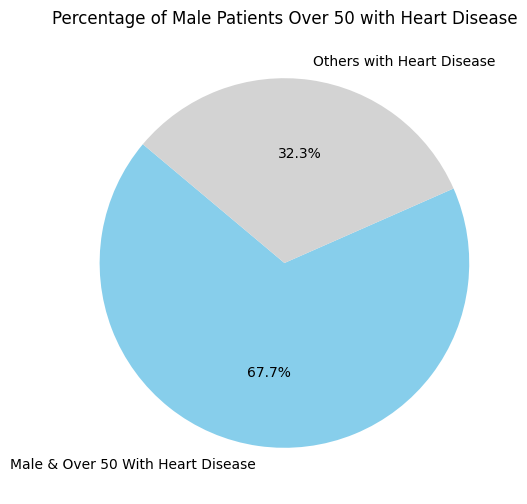

In [261]:
# Prompt 1: Percentage of patients with heart disease who are male and over 50 years old
heart_disease_patients = df[df['HeartDisease'] == 1]
male_over_50 = heart_disease_patients[(heart_disease_patients['Sex'] =='M') & (heart_disease_patients['Age'] > 50)]
percentage_of_male_over_50 = len(male_over_50)/len(heart_disease_patients) * 100

# Visualization
plt.figure(figsize=(6, 6))
labels = ['Male & Over 50 With Heart Disease', 'Others with Heart Disease']
sizes = [len(male_over_50), len(heart_disease_patients) - len(male_over_50)]
colors = ['skyblue', 'lightgray']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Percentage of Male Patients Over 50 with Heart Disease')
plt.show()

### The Median Age of Patients Diagnosed With Heart Disease

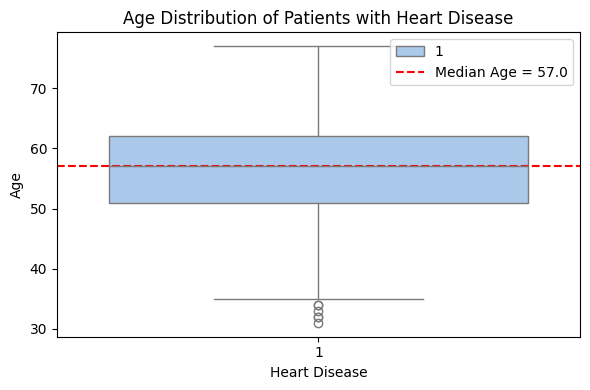

In [262]:
median_age = heart_disease_patients['Age'].median()
# Visualization
plt.figure(figsize=(6, 4))
sns.boxplot(data=heart_disease_patients, x='HeartDisease', y='Age', hue = 'HeartDisease', palette='pastel')
plt.axhline(median_age, color='red', linestyle='--', label=f'Median Age = {median_age}')
plt.title('Age Distribution of Patients with Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.legend()
plt.tight_layout()
plt.show();

Looking at the data distribution from the above plots, we can start to identify some features that could be relevant to use. We will clean uo the dataset a bit before narrowing down our features.

# Data Cleaning

**Observations from the previous section**
- The dataset is highly skewed towards male patients. 725 rows correspond to male patients, whereas only 193 correspond to female patients. This could potentially induce a bias in our model and impact predictions for any female patients in any unseen data.
- 410 patients were not diagnosed with heart disease, whereas 508 patients were. The target variable is somewhat evenly distributed, which is beneficial for training our model.
- A significant number of patients, 392, diagnosed with heart disease have asymptomatic (ASY) chest pain. While chest pain could be a relevant feature for our model, it's should be noted that asymptomatic implies that those patients who had heart disease did not have chest pain as a symptom.
- A high number (170) of patients with blood sugar greater than 120 mg/dl were diagnosed with heart disease in relation to those who were not.

There are a lot of similar patterns that we can observe when we start grouping our data. These patterns can help us narrow down the features we want for training our model.

Before we move on to that, let's clean up the data. We identified that there are no missing values. However, as we noticed earlier, a couple of columns have 0 values that don't make sense.

In [263]:
# Zero resting BP Rows
zero_restingbp = df[df['RestingBP'] == 0]
zero_restingbp

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


This is only one row and we can simply drop it

In [264]:
df_clean = df.copy()
df_clean = df_clean[df_clean["RestingBP"] != 0]

In [265]:
# Zero Cholestrol Rows
zero_cholestrol = df_clean[df_clean['Cholesterol'] == 0]
zero_cholestrol

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


Let's see the percentage of these rows compared to the whole column

In [266]:
len(zero_cholestrol['Cholesterol'])/len(df_clean['Cholesterol']) * 100

18.647764449291166

This is 18% of the rows. Dropping them will greatly reduce the size of our dataset. It seems like the gender is only male and we could impute with the median value for males. However, let us confirm.

In [267]:
male_zero_cholestrol = zero_cholestrol[zero_cholestrol['Sex'] == 'M']
male_zero_cholestrol
#                                     heart_disease_patients = df[df['HeartDisease'] == 1]
# male_over_50 = heart_disease_patients[(heart_disease_patients['Sex'] =='M') & (heart_disease_patients['Age'] > 50)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


Not all the zero-cholestrol values are for males. The ages are also very distributed. We will impute each with the median cholestrol value for each.
When there are outliers in the dataset, we should use median imputation. So, I will use median imputation because median imputation is robust to outliers.

In [268]:
import numpy as np
median_cholesterol = df_clean['Cholesterol'].median()
df_clean['Cholesterol'] = df_clean['Cholesterol'].replace(0, median_cholesterol)

# Checking to see whether it has worked
zero_cholestrol = df_clean[df_clean['Cholesterol'] == 0]
zero_cholestrol

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [269]:
df_clean[['Cholesterol', 'RestingBP']].describe()

,Cholesterol,RestingBP
count,917.000000,917.000000
mean,240.600872,132.540894
std,54.009298,17.999749
min,85.000000,80.000000
25%,214.000000,120.000000
50%,223.000000,130.000000
75%,267.000000,140.000000
max,603.000000,200.000000


In [270]:
df_clean.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

The minimum values for both have changed. There are no more zero values in either of those.

# Feature Selection

Thanks to our EDA and a general understanding of the features, we can identify some of the features we could start with:  
- **Age**
- **Sex**
- **ChestPainType**
- **Cholesterol**
- **FastingBS**

We will also identify how strongly the feature columns are correlated to the target column. This could help us narrow down on the features.

In order to do that, we will first convert our categorical columns into dummy variables.

### Converting Categorical Features Into Dummy Variables
The categorical features are: 
`Sex`, `ChestPainType`, `FastingBS`, `RestingECG`, `ExerciseAngina`, `STSlope`

In [271]:
df_clean = pd.get_dummies(df_clean, drop_first=True)
df_clean.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


Now we can find how they are correlated

### Create a Pearson's Correlation Heatmap

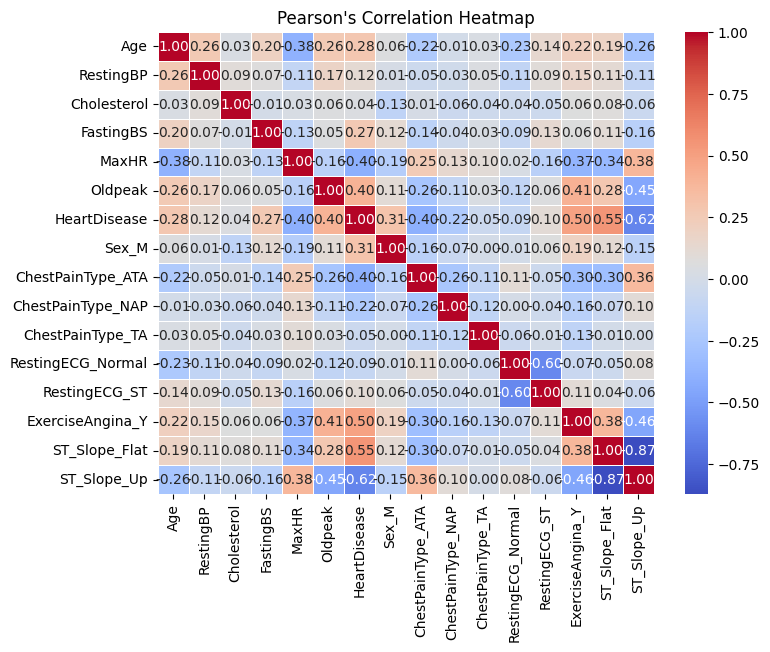

In [272]:
# Compute the Pearson correlation matrix
correlation_matrix = df_clean.corr(method='pearson')

# Create the heatmap
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(
    correlation_matrix,
    annot=True,         # Display the correlation values in each cell
    cmap='coolwarm',    # Color scheme for the heatmap
    fmt='.2f',          # Format the numbers to 2 decimal places
    linewidths=0.5,     # Add lines between cells for clarity
    cbar=True           # Include a color bar
)
plt.title("Pearson's Correlation Heatmap")  # Add a title
plt.show()

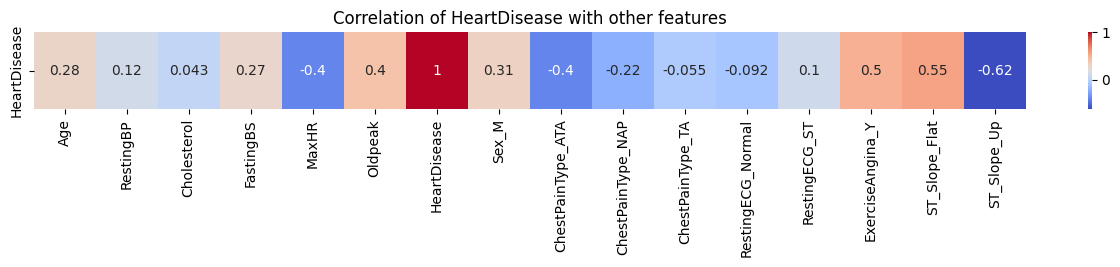

In [273]:
# Show the correlation of all features with HeartDisease

corr_with_column = correlation_matrix['HeartDisease']

#Convert it to a DataFrame (for easier plotting)
corr_df = pd.DataFrame(corr_with_column)

# Create a heatmap using Seaborn
plt.figure(figsize=(16,1))
sns.heatmap(corr_df.T, annot=True, cmap='coolwarm', cbar=True)  # Transpose to display horizontally
plt.title(f"Correlation of HeartDisease with other features")
plt.show()

The features that are reasonaly correlated to `HeartDisease` based on the correlation heatmap are:

In [274]:
# Identify features with strong positive and negative correlations with the target
target_correlation = correlation_matrix['HeartDisease']

# Define thresholds for strong correlations
positive_threshold = 0.25
negative_threshold = -0.25

# Identify features with strong positive correlations
strong_positive = target_correlation[target_correlation > positive_threshold]

# Identify features with strong negative correlations
strong_negative = target_correlation[target_correlation < negative_threshold]

# Combine and print results
print("\nFeatures strongly positively correlated with HeartDisease:")
print(strong_positive)

print("\nFeatures strongly negatively correlated with HeartDisease:")
print(strong_negative)


Features strongly positively correlated with HeartDisease:
Age                 0.282012
FastingBS           0.267994
Oldpeak             0.403638
HeartDisease        1.000000
Sex_M               0.305118
ExerciseAngina_Y    0.495490
ST_Slope_Flat       0.553700
Name: HeartDisease, dtype: float64

Features strongly negatively correlated with HeartDisease:
MaxHR               -0.401410
ChestPainType_ATA   -0.401680
ST_Slope_Up         -0.621843
Name: HeartDisease, dtype: float64


The correlation coefficient threshold was chosen based on what made sense when looking at the heat map.
Surprisingly, Cholesterol is not strongly correlated to HeartDisease. We can consider ignoring the feature for now.

Given everything we have attempted so far, we can narrow down the features that might be relevant. These are:
- `Oldpeak`
- `ExerciseAngina_Y`
- `ST_Slope_Flat`
- `MaxHR`
- `ChestPainType_ATA`
- `ST_Slope_Up`

Next, we will create and train multiple models using one of those features at a time

We will start by creating a model for each of the features above and evaluate their performance using accuracy as a metric.

## Building a Classifier with One Feature

We will split our data into a training and test set first

In [275]:
from sklearn.model_selection import train_test_split
X = df_clean.drop(['HeartDisease'], axis = 1)
y = df_clean['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

features = [
    'Oldpeak',
    'ExerciseAngina_Y',
    'ST_Slope_Flat',
    'MaxHR',
    'ChestPainType_ATA',
    'ST_Slope_Up'
]

In [276]:
from sklearn.neighbors import KNeighborsClassifier
for feature in features:
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train[[feature]], y_train)
    accuracy = knn.score(X_test[[feature]], y_test)
    print(f"The K-NN classifier trained on {feature} and with k =3 has an accuracy score of {accuracy*100:.2f}%")

The K-NN classifier trained on Oldpeak and with k =3 has an accuracy score of 66.85%
The K-NN classifier trained on ExerciseAngina_Y and with k =3 has an accuracy score of 67.39%
The K-NN classifier trained on ST_Slope_Flat and with k =3 has an accuracy score of 76.09%
The K-NN classifier trained on MaxHR and with k =3 has an accuracy score of 66.85%
The K-NN classifier trained on ChestPainType_ATA and with k =3 has an accuracy score of 39.13%
The K-NN classifier trained on ST_Slope_Up and with k =3 has an accuracy score of 78.80%


The best performing model with an accuracy of `79%` was trained on ST_Slope_Up feature with ST_Slope_Flat beinga  close second with 76%. This makes sense given the distributions we saw previously. 

We will train a model using all these features next.

## Building a Classifier With Multiple Features

In [277]:
X = df_clean[['Oldpeak', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'MaxHR', 'ChestPainType_ATA', 'ST_Slope_Up']] # Select Features
y = df_clean['HeartDisease'] # Select Target

In [279]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
# Create the Scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the training features
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation features
X_test_scaled = scaler.transform(X_test)

# Create a k-NN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors

# Fit the model to the training data
knn.fit(X_train_scaled, y_train)

# Make predictions on the training set
y_train_pred = knn.predict(X_train_scaled)

# Make predictions on the validation set
y_pred = knn.predict(X_test_scaled)

# Calculate and print the accuracy of the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Train Accuracy of the Random Forest model: {train_accuracy:.2f}")
print(f"Test Accuracy of the Random Forest model: {test_accuracy:.2f}")
print("Train and Test Accuracy Difference:", train_accuracy - test_accuracy)

Train Accuracy of the Random Forest model: 0.86
Test Accuracy of the Random Forest model: 0.81
Train and Test Accuracy Difference: 0.05593316878678567


The model's accuracy jumped to `81%`. That is not a significant improvement and a good start. Using all these features results in an improved model. 

We have also checked for overfitting and the difference here between the train and test accuracy is `0.06`. This is a metric that we will look at moving forward for all models as we want the least overfit model that will generalize best to unseen data.

However, let's see what parameters/hyperparameters might be optimal.

### Grid Search CV: Obtaining the Best Parameters

In [280]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid for k-NN
param_grid = {
    'n_neighbors': range(1,20),          # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting of neighbors
    'metric': ['minkowski', 'manhattan'] # Distance metrics
}

# Instantiate a k-NN model
knn = KNeighborsClassifier()

# Create a GridSearchCV instance
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='accuracy',
    # cv=5,  # 5-fold cross-validation
    # verbose=1,
    # n_jobs=-1  # Use all available processors
)

# Fit the GridSearchCV instance on the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Print the best score and the best parameters obtained from the grid search
print("\nBest Accuracy Score from Grid Search:", grid_search.best_score_)
print("Best Parameters from Grid Search:", grid_search.best_params_)


Best Accuracy Score from Grid Search: 0.8397757325716704
Best Parameters from Grid Search: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}


Our best model had an accuracy of `84%` with 11 neighbors, uniform weights, and manhattan distance metric. This is the accuracy on the train set.

The accuracy of this model is much better. Since GridSearchCV employs a cross-validation approach, it is reasonable to assume that this is a better estimate of how the model performs compared to our previous attempt.

We will evaluate our model on our test set and also check for overfitting now.

## Model Evaluation on Test Set

In [237]:
# Evaluate the best model on the test set
best_knn = grid_search.best_estimator_

# Predict the output on the train set
y_train_pred = best_knn.predict(X_train_scaled)
# Predict the output on the scaled test set
y_test_pred = best_knn.predict(X_test_scaled)

# Calculate and print the accuracy of the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Train Accuracy of the Random Forest model: {train_accuracy:.2f}")
print(f"Test Accuracy of the Random Forest model: {test_accuracy:.2f}")
print("Train and Test Accuracy Difference:", train_accuracy - test_accuracy)

Train Accuracy of the Random Forest model: 0.85
Test Accuracy of the Random Forest model: 0.81
Train and Test Accuracy Difference: 0.04283273210556293


The accuracy on the test set is similar to the baseline's which was 81%. However, it is slightly less overfit, with the accuracy difference being 0.04, which makes it a better model for generalizing to unseen data. 

This accuracy level means that our model is likely to correct predict whether a patient is at risk for a heart disease 81% of the time.

### Confusion matrix

So far we evaluated the model simply by looking at the accuracy: the percentage of correct prediction.

What is also interesting to get insight into, is whether it is more accurate for getting the prediction wrong for either the case where in reality HeartDisease = 1 (which would be a 'false negative') or for the case where in reality HeartDisease = 0 (which would be a 'false positive').

That insight would be very helpful when interpreting any outcome for a new data point. Let's create a confusion matrix to gain this insight.

Confusion Matrix:
 [[ 74  16]
 [ 30 110]]


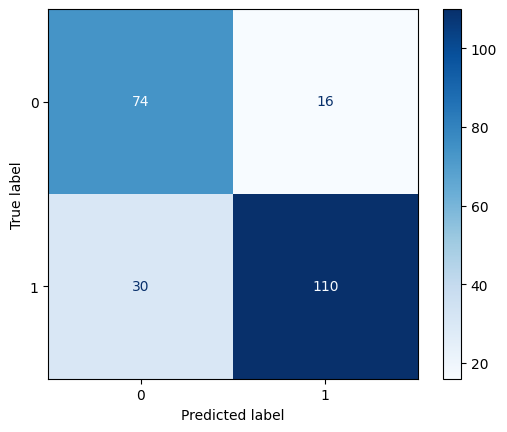

In [238]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Visualize the confusion matrix using a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['0','1'])
disp.plot(cmap=plt.cm.Blues)

# Display the plot
plt.show()

Working with the first KNN Model as our baseline, let us now try other algorithms and see whether they will preform better. We will try the following:
- Random Forest
- Decision Tree
- Support Vector Class (SVC_)
- 

In [239]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


## Random Forest

In [249]:
# Create a Random Forest model
rf = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf.fit(X_train_scaled, y_train)

# Make predictions on the train set
y_train_pred = rf.predict(X_train_scaled)

# Make predictions on the validation set
y_pred = rf.predict(X_test_scaled)

# Calculate and print the accuracy of the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Train Accuracy of the Random Forest model: {train_accuracy:.2f}")
print(f"Test Accuracy of the Random Forest model: {test_accuracy:.2f}")
print("Train and Test Accuracy Difference:", train_accuracy - test_accuracy)

Train Accuracy of the Random Forest model: 0.98
Test Accuracy of the Random Forest model: 0.77
Train and Test Accuracy Difference: 0.20861970761344217


The accuracy has reduced from our best performing KNN model and the model is extremely overfit. We will, however, do a GridSearchCV to see whether there is any improvemement.

## Hyperparameter Tuning for RandomForest

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples at a leaf node
    'bootstrap': [True, False],  # Whether to bootstrap samples
}

# Instantiate a FR model
rf = RandomForestClassifier(random_state=42)

# Create a GridSearchCV instance
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='accuracy',
    # cv=5,  # 5-fold cross-validation
    # verbose=1,
    # n_jobs=-1  # Use all available processors
)

# Fit the GridSearchCV instance on the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
best_rf = grid_search.best_estimator_

# Predict the output on the train set
y_train_pred = best_rf.predict(X_train_scaled)
# Predict the output on the scaled test set
y_test_pred = best_rf.predict(X_test_scaled)

# Calculate and print the accuracy of the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Train Accuracy of the Tuned Random Forest model: {train_accuracy:.2f}")
print(f"Test Accuracy of the Tuned Random Forest model: {test_accuracy:.2f}")
print("Train and Test Accuracy Difference:", train_accuracy - test_accuracy)

Best Parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.8514651433407383
Train Accuracy of the Tuned Random Forest model: 0.92
Test Accuracy of the Tuned Random Forest model: 0.81
Train and Test Accuracy Difference: 0.10833491551167651


While tuning has improved the accuracy, now `81%` and lowered the overfitting,now `0.1`, the model is still very overfit and not a better choice compared to the tuned KNN one.

## Decision Tree

In [283]:
# Create a Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt.fit(X_train_scaled, y_train)

# Make predictions on the train set
y_train_pred = dt.predict(X_train_scaled)

# Make predictions on the validation set
y_pred = dt.predict(X_test_scaled)

# Calculate and print the accuracy of the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Train Accuracy of the Decision Tree model: {train_accuracy:.2f}")
print(f"Test Accuracy of the Decision Tree model: {test_accuracy:.2f}")
print("Train and Test Accuracy Difference:", train_accuracy - test_accuracy)

Train Accuracy of the Decision Tree model: 0.98
Test Accuracy of the Decision Tree model: 0.73
Train and Test Accuracy Difference: 0.24775014239605087


This model's accuracy is the lowest so far at `73%`. It is also very overfit with an accuracy difference of `0.24`. Let's also tune it and see if this improves it.

In [284]:
param_grid = {
    'criterion': ['gini', 'entropy'],        # Splitting criteria
    'max_depth': [2, 3, 4, None],            # Maximum tree depth
    'min_samples_split': [2, 5, 10],         # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],           # Minimum samples in a leaf node
}
# Instantiate the model
dt = DecisionTreeClassifier(random_state=42)

# Create a GridSearchCV instance
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring='accuracy',
    # cv=5,  # 5-fold cross-validation
    # verbose=1,
    # n_jobs=-1  # Use all available processors
)

# Fit the GridSearchCV instance on the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
best_dt = grid_search.best_estimator_

# Predict the output on the train set
y_train_pred = best_dt.predict(X_train_scaled)
# Predict the output on the scaled test set
y_test_pred = best_dt.predict(X_test_scaled)

# Calculate and print the accuracy of the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Train Accuracy of the Tuned Decision Tree model: {train_accuracy:.2f}")
print(f"Test Accuracy of the Tuned Decision Tree model: {test_accuracy:.2f}")
print("Train and Test Accuracy Difference:", train_accuracy - test_accuracy)

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.8311223950068761
Train Accuracy of the Tuned Decision Tree model: 0.84
Test Accuracy of the Tuned Decision Tree model: 0.73
Train and Test Accuracy Difference: 0.10946775520536678


While tuning has lowered the overfitting and the train accuracy, the model still has the lowest validation accuracy. 

Let's try the final option which is support vector machine

In [285]:
# Create a SVM model
svc = SVC(random_state=42)

# Fit the model to the training data
svc.fit(X_train_scaled, y_train)

# Make predictions on the train set
y_train_pred = svc.predict(X_train_scaled)

# Make predictions on the validation set
y_pred = svc.predict(X_test_scaled)

# Calculate and print the accuracy of the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Train Accuracy of the SVC model: {train_accuracy:.2f}")
print(f"Test Accuracy of the SVC model: {test_accuracy:.2f}")
print("Train and Test Accuracy Difference:", train_accuracy - test_accuracy)

Train Accuracy of the SVC model: 0.84
Test Accuracy of the SVC model: 0.82
Train and Test Accuracy Difference: 0.018125435099044296


We now have our best performing model! The test accuracy is `82%`, which is the best so far. The train accuracy is `84%`, which makes it the least overfit, with a train and test accuracy difference of 0.02. 

We will also tune it to see whether it improves even further.

In [286]:
param_grid = {
    'C':[1, 2, 3],
    'degree':[1, 2, 3],
    'gamma':['scale', 'auto'],
    'shrinking':[True, False],
    'class_weight':['balanced', None],
}


# Instantiate the model
svc = SVC(random_state=42)

# Create a GridSearchCV instance
grid_search = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    scoring='accuracy',
    # cv=5,  # 5-fold cross-validation
    # verbose=1,
    # n_jobs=-1  # Use all available processors
)

# Fit the GridSearchCV instance on the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
best_svc = grid_search.best_estimator_

# Predict the output on the train set
y_train_pred = best_svc.predict(X_train_scaled)
# Predict the output on the scaled test set
y_test_pred = best_svc.predict(X_test_scaled)

# Calculate and print the accuracy of the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Train Accuracy of the Tuned SVC model: {train_accuracy:.2f}")
print(f"Test Accuracy of the Tuned SVC model: {test_accuracy:.2f}")
print("Train and Test Accuracy Difference:", train_accuracy - test_accuracy)

Best Parameters: {'C': 1, 'class_weight': None, 'degree': 1, 'gamma': 'scale', 'shrinking': True}
Best Cross-Validation Accuracy: 0.825240664339363
Train Accuracy of the Tuned SVC model: 0.84
Test Accuracy of the Tuned SVC model: 0.82
Train and Test Accuracy Difference: 0.018125435099044296


It seems that the best parameters are the default ones since the accuracies have remained the same. This is our final selected model.

As a final check, let's see whether using Standard Scaling instead of MinMax Scaling improves our results.

In [291]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform the training features
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation features
X_test_scaled = scaler.transform(X_test)

# Fit the GridSearchCV instance on the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
best_svc = grid_search.best_estimator_

# Predict the output on the train set
y_train_pred = best_svc.predict(X_train_scaled)
# Predict the output on the scaled test set
y_test_pred = best_svc.predict(X_test_scaled)

# Calculate and print the accuracy of the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Train Accuracy of the Tuned SVC model: {train_accuracy:.2f}")
print(f"Test Accuracy of the Tuned SVC model: {test_accuracy:.2f}")
print("Train and Test Accuracy Difference:", train_accuracy - test_accuracy)



Best Parameters: {'C': 2, 'class_weight': 'balanced', 'degree': 1, 'gamma': 'scale', 'shrinking': True}
Best Cross-Validation Accuracy: 0.8383476145139109
Train Accuracy of the Tuned SVC model: 0.86
Test Accuracy of the Tuned SVC model: 0.82
Train and Test Accuracy Difference: 0.04432630846148977


While this is still a better model than others, it still is not better than the MinMax scaled one, indicating that we chose the best scaling method.

Let's create a confusion matrix for the same to see the false positives and negatives.

Confusion Matrix:
 [[ 72  18]
 [ 24 116]]


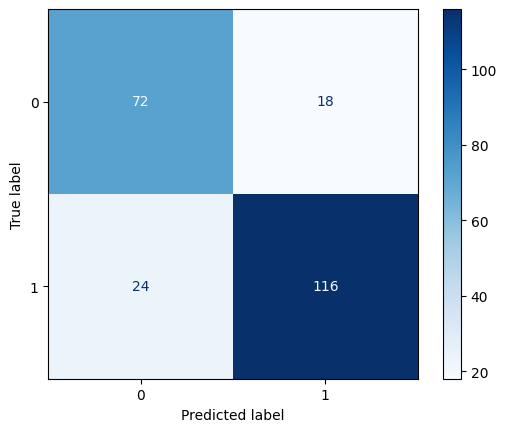

In [287]:
# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Visualize the confusion matrix using a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['0','1'])
disp.plot(cmap=plt.cm.Blues)

# Display the plot
plt.show()

This is much better output than the previous best model (tunes KNN model). 
- **True Positives**- 116
- **True Negatives**- 72
- **False Positives**- 18
- **False Negatives**- 24

We will visualize the Train Accuracy, Test Accuracy, and difference between accuracies, of the best performing iterations of all the models for a proper comparison.

In [290]:
# Create a table with these variables
models = ['KNNeighbors', 'RandomForest', 'DecisionTree', 'SupportVectorClass']
train_accuracies = [0.85, 0.92, 0.84, 0.84]
test_accuracies= [0.81, 0.81, 0.73, 0.82]


models_comparison =  pd.DataFrame({
    'Model': models,
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies,
})
models_comparison['Accuracies Difference'] = models_comparison['Train Accuracy']- models_comparison['Test Accuracy']
models_comparison

,Model,Train Accuracy,Test Accuracy,Accuracies Difference
0,KNNeighbors,0.85,0.81,0.04
1,RandomForest,0.92,0.81,0.11
2,DecisionTree,0.84,0.73,0.11
3,SupportVectorClass,0.84,0.82,0.02


# Conclusion
1. Model's Performance:
The final model is the SVC model with an accuracy of 82%, suggesting that it performs well at predicting the presence of heart disease based on the provided features. 

The final model was trained on the following features: 
- `Oldpeak`
- `ExerciseAngina_Y`
- `ST_Slope_Flat`
- `MaxHR`
- `ChestPainType_ATA`
- `ST_Slope_Up`
2. Potential Improvements to get better results:
- Feature Engineering: Adding more relevant features like smoking status, family history, or BMI might improve performance.
- Hyperparameter Tuning: Expanding the grid search with additional parameters such as p for Minkowski distance.
- Exploring other algorithms  that could perform better than SVC like ensemble ones
- Try and collect more data.
- Experimenting with another scaling method e.g. standardscaling